In [1]:
# check all 3

In [2]:
# attempt 2

/tmp/ipykernel_816280/2275782339.py:96: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cnn_model.load_state_dict(torch.load("hand_gesture_model.pth", map_location=device))
/t


Testing dataset: new_dataset_1
Available classes: ['fist', 'five']
Class to index mapping: {'fist': 0, 'five': 1}

--- CNN on new_dataset_1 ---
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Classification report error: Number of classes, 4, does not match size of target_names, 2. Try specifying the labels parameter
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     212.0
           1       0.00      0.00      0.00     184.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0

    accuracy                           0.00     396.0
   macro avg       0.00      0.00      0.00     396.0
weighted avg       0.00      0.00      0.00     396.0



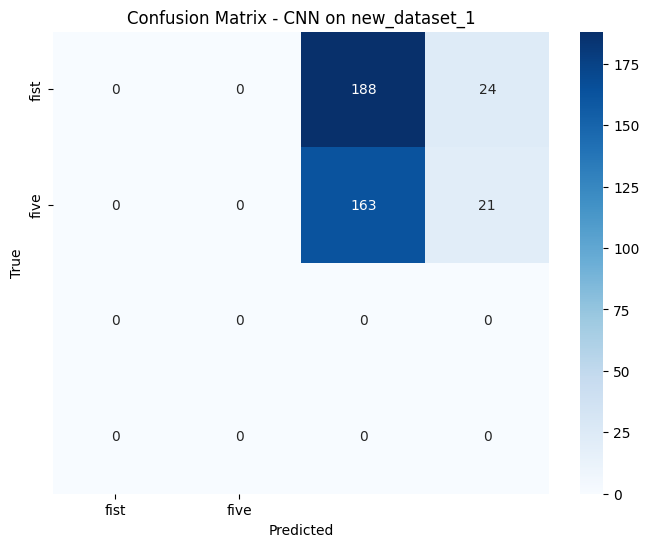


--- ResNet50 on new_dataset_1 ---
Accuracy: 0.18181818181818182
Precision: 0.12034009156311315
Recall: 0.18181818181818182
F1 Score: 0.14482487209759937
Classification report error: Number of classes, 3, does not match size of target_names, 2. Try specifying the labels parameter
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       212
           1       0.26      0.39      0.31       184
           2       0.00      0.00      0.00         0

    accuracy                           0.18       396
   macro avg       0.09      0.13      0.10       396
weighted avg       0.12      0.18      0.14       396



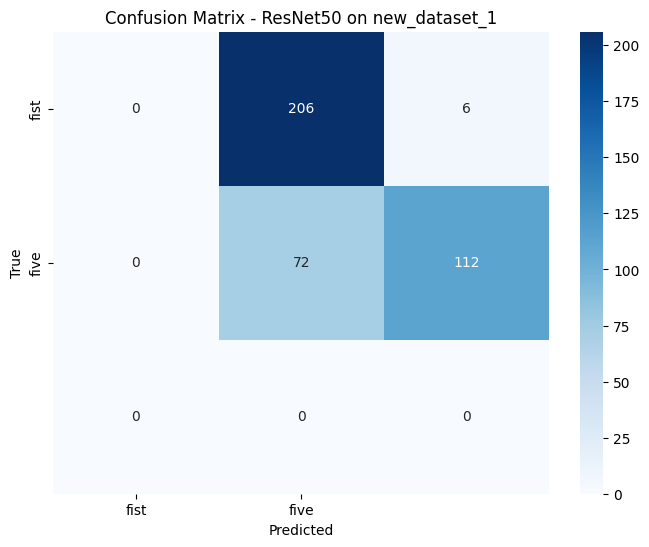


--- Random Forest on new_dataset_1 ---
Accuracy: 0.05555555555555555
Precision: 0.14197530864197533
Recall: 0.05555555555555555
F1 Score: 0.0798611111111111
Classification report error: Number of classes, 5, does not match size of target_names, 2. Try specifying the labels parameter
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       212
           1       0.31      0.12      0.17       184
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.06       396
   macro avg       0.06      0.02      0.03       396
weighted avg       0.14      0.06      0.08       396



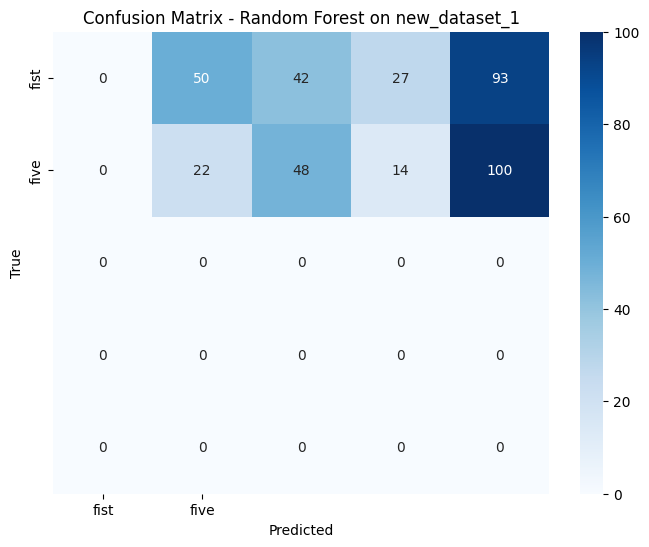


Testing dataset: new_dataset_2
Available classes: ['ok', 'thumbsup', 'fist', 'five']
Class to index mapping: {'ok': 0, 'thumbsup': 1, 'fist': 2, 'five': 3}

--- CNN on new_dataset_2 ---
Accuracy: 0.25
Precision: 0.0625
Recall: 0.25
F1 Score: 0.1
              precision    recall  f1-score   support

          ok       0.25      1.00      0.40       200
    thumbsup       0.00      0.00      0.00       200
        fist       0.00      0.00      0.00       200
        five       0.00      0.00      0.00       200

    accuracy                           0.25       800
   macro avg       0.06      0.25      0.10       800
weighted avg       0.06      0.25      0.10       800



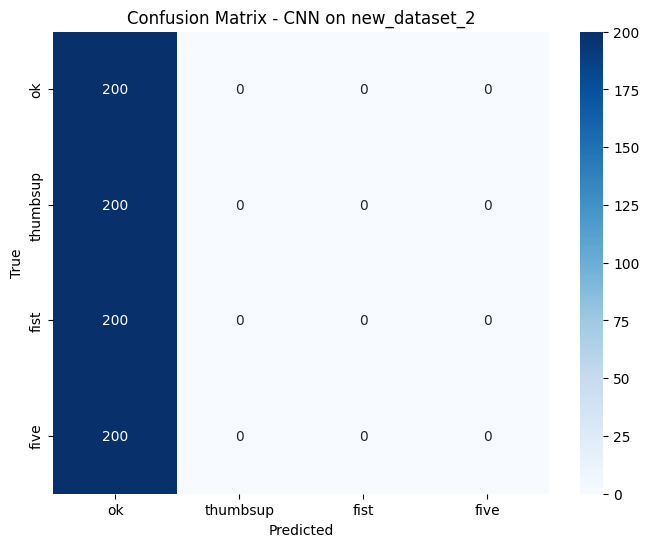


--- ResNet50 on new_dataset_2 ---
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Classification report error: Number of classes, 5, does not match size of target_names, 4. Try specifying the labels parameter
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     200.0
           1       0.00      0.00      0.00     200.0
           2       0.00      0.00      0.00     200.0
           3       0.00      0.00      0.00     200.0
           5       0.00      0.00      0.00       0.0

    accuracy                           0.00     800.0
   macro avg       0.00      0.00      0.00     800.0
weighted avg       0.00      0.00      0.00     800.0



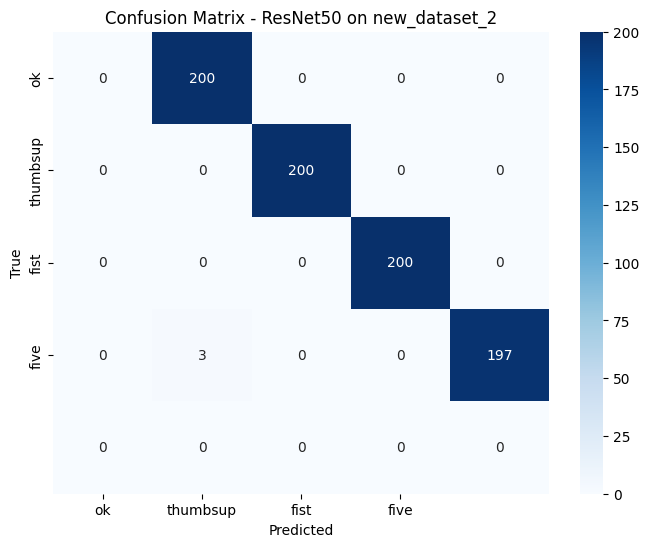


--- Random Forest on new_dataset_2 ---
Accuracy: 0.11375
Precision: 0.11097560975609756
Recall: 0.11375
F1 Score: 0.11234567901234568
Classification report error: Number of classes, 6, does not match size of target_names, 4. Try specifying the labels parameter
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       200
           1       0.44      0.46      0.45       200
           2       0.00      0.00      0.00       200
           3       0.00      0.00      0.00       200
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.11       800
   macro avg       0.07      0.08      0.07       800
weighted avg       0.11      0.11      0.11       800



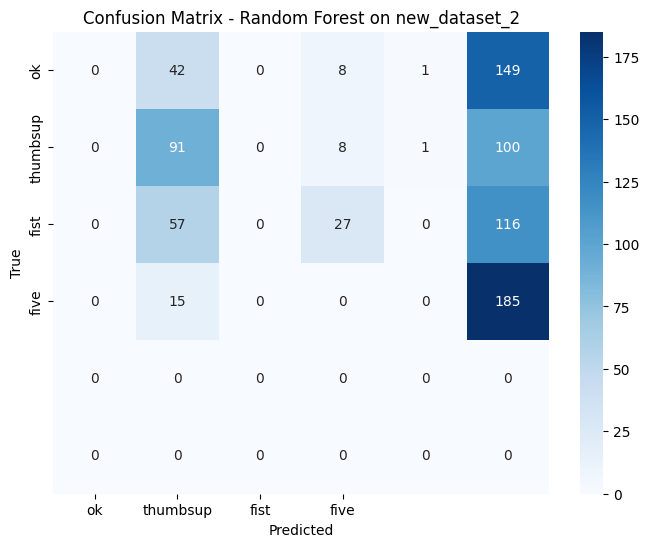

In [6]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- CNN Model Definition ----------
class HandGestureCNN(nn.Module):
    def __init__(self):
        super(HandGestureCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.drop1 = nn.Dropout(0.25)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.drop2 = nn.Dropout(0.25)

        self.fc1 = nn.Linear(64 * 25 * 30, 128)
        self.drop3 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 6)

    def forward(self, x):
        x = self.drop1(self.pool1(torch.relu(self.bn1(self.conv1(x)))))
        x = self.drop2(self.pool2(torch.relu(self.bn2(self.conv2(x)))))
        x = x.view(-1, 64 * 25 * 30)
        x = self.drop3(torch.relu(self.fc1(x)))
        return self.fc2(x)

# ---------- RF Feature Extraction ----------
def extract_hog_features(X):
    features = []
    for image in X:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (120, 100))
        hog_vec, _ = hog(resized, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        features.append(hog_vec)
    return np.array(features)

# ---------- Evaluation Function ----------
def evaluate_model(y_true, y_pred, class_names, title):
    print(f"\n--- {title} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted', zero_division=0))
    print("Recall:", recall_score(y_true, y_pred, average='weighted', zero_division=0))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted', zero_division=0))

    try:
        print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))
    except ValueError as e:
        print("Classification report error:", e)
        print(classification_report(y_true, y_pred, zero_division=0))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="Blues")
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# ---------- Paths and Setup ----------
data_paths = [
    "/home/npp-vlm/Dipan EXP/ADataMining/experiment_den/new_dataset_1",
    "/home/npp-vlm/Dipan EXP/ADataMining/experiment_den/new_dataset_2"
]

list_of_gestures = ['blank', 'ok', 'thumbsup', 'thumbsdown', 'fist', 'five']

cnn_transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((100, 120)),
    transforms.ToTensor()
])

resnet_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# ---------- Load Models ----------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

cnn_model = HandGestureCNN()
cnn_model.load_state_dict(torch.load("hand_gesture_model.pth", map_location=device))
cnn_model.to(device)
cnn_model.eval()

resnet_model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
resnet_model.fc = nn.Sequential(
    nn.Linear(resnet_model.fc.in_features, 1024),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(1024, 6)
)
resnet_model.load_state_dict(torch.load("best_resnet_model.pth", map_location=device))
resnet_model.to(device)
resnet_model.eval()

import joblib
rf_model = joblib.load("hand_gesture_rf_model.pkl")

# ---------- Main Loop ----------
for path in data_paths:
    dataset_name = os.path.basename(path)
    present_classes = [cls for cls in list_of_gestures if os.path.exists(os.path.join(path, cls))]
    class_to_idx = {cls: idx for idx, cls in enumerate(present_classes)}

    print(f"\nTesting dataset: {dataset_name}")
    print("Available classes:", present_classes)
    print("Class to index mapping:", class_to_idx)

    # CNN
    cnn_data = datasets.ImageFolder(path, transform=cnn_transform)
    cnn_loader = DataLoader(cnn_data, batch_size=32, shuffle=False)
    y_true, y_pred = [], []
    with torch.no_grad():
        for imgs, labels in cnn_loader:
            imgs = imgs.to(device)
            outputs = cnn_model(imgs)
            _, preds = torch.max(outputs, 1)
            y_pred.extend(preds.cpu().numpy())
            y_true.extend(labels.numpy())
    evaluate_model(y_true, y_pred, present_classes, f"CNN on {dataset_name}")

    # ResNet50
    resnet_data = datasets.ImageFolder(path, transform=resnet_transform)
    resnet_loader = DataLoader(resnet_data, batch_size=32, shuffle=False)
    y_true, y_pred = [], []
    with torch.no_grad():
        for imgs, labels in resnet_loader:
            imgs = imgs.to(device)
            outputs = resnet_model(imgs)
            _, preds = torch.max(outputs, 1)
            y_pred.extend(preds.cpu().numpy())
            y_true.extend(labels.numpy())
    evaluate_model(y_true, y_pred, present_classes, f"ResNet50 on {dataset_name}")

    # RF
    images, labels = [], []
    for idx, cls in enumerate(present_classes):
        cls_folder = os.path.join(path, cls)
        for fname in os.listdir(cls_folder):
            img_path = os.path.join(cls_folder, fname)
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)
                labels.append(idx)
    hog_feats = extract_hog_features(images)
    X_scaled = StandardScaler().fit_transform(hog_feats)
    preds = rf_model.predict(X_scaled)
    evaluate_model(labels, preds, present_classes, f"Random Forest on {dataset_name}")

In [4]:
##binary imaged

/tmp/ipykernel_816280/3120484115.py:101: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cnn_model.load_state_dict(torch.load("hand_gesture_model.pth", map_location=device))
/


Testing dataset: new_dataset_1
Available classes: ['fist', 'five']

--- CNN on new_dataset_1 ---
Accuracy: 0.005050505050505051
Precision: 0.30976430976430974
Recall: 0.005050505050505051
F1 Score: 0.009938961810619564
Classification report error: Number of classes, 5, does not match size of target_names, 2. Try specifying the labels parameter
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       212
           1       0.67      0.01      0.02       184
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.01       396
   macro avg       0.13      0.00      0.00       396
weighted avg       0.31      0.01      0.01       396



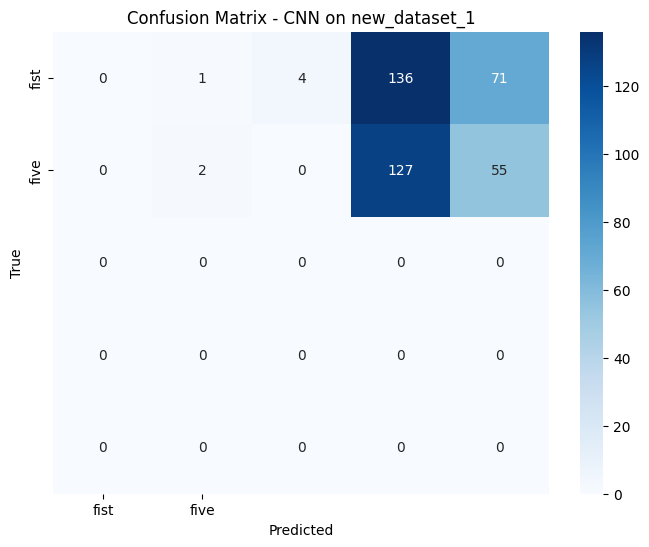


--- ResNet50 on new_dataset_1 ---
Accuracy: 0.26262626262626265
Precision: 0.1851464839970587
Recall: 0.2626262626262626
F1 Score: 0.21718306662126888
Classification report error: Number of classes, 4, does not match size of target_names, 2. Try specifying the labels parameter
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       212
           1       0.40      0.57      0.47       184
           2       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.26       396
   macro avg       0.10      0.14      0.12       396
weighted avg       0.19      0.26      0.22       396



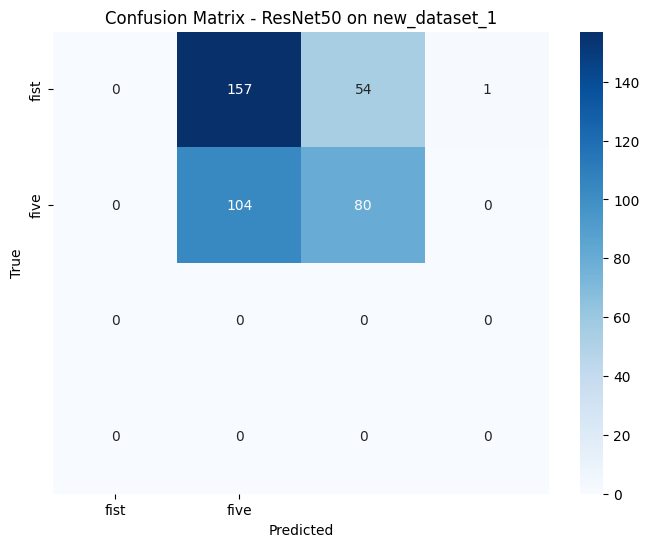


--- Random Forest on new_dataset_1 ---
Accuracy: 0.017676767676767676
Precision: 0.2710437710437711
Recall: 0.017676767676767676
F1 Score: 0.033189033189033185
Classification report error: Number of classes, 5, does not match size of target_names, 2. Try specifying the labels parameter
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       212
           1       0.58      0.04      0.07       184
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.02       396
   macro avg       0.12      0.01      0.01       396
weighted avg       0.27      0.02      0.03       396



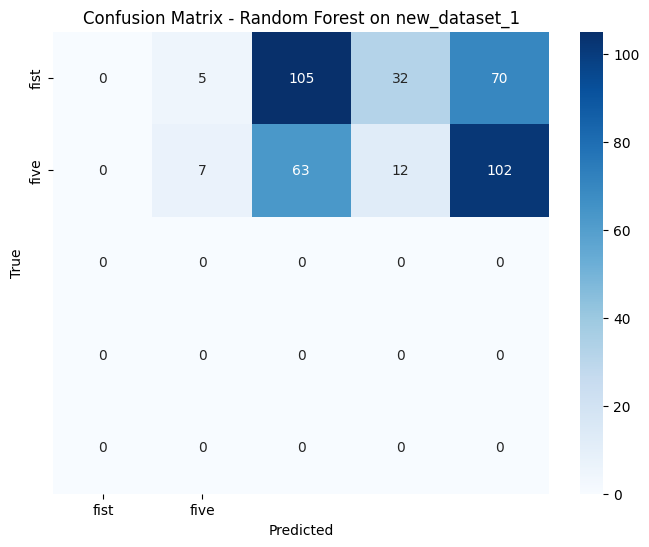


Testing dataset: new_dataset_2
Available classes: ['ok', 'thumbsup', 'fist', 'five']

--- CNN on new_dataset_2 ---
Accuracy: 0.25
Precision: 0.0625
Recall: 0.25
F1 Score: 0.1
              precision    recall  f1-score   support

          ok       0.25      1.00      0.40       200
    thumbsup       0.00      0.00      0.00       200
        fist       0.00      0.00      0.00       200
        five       0.00      0.00      0.00       200

    accuracy                           0.25       800
   macro avg       0.06      0.25      0.10       800
weighted avg       0.06      0.25      0.10       800



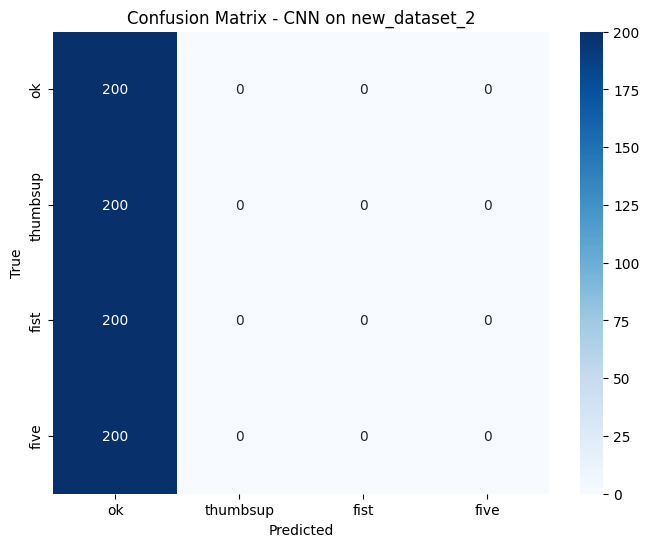


--- ResNet50 on new_dataset_2 ---
Accuracy: 0.34625
Precision: 0.28617877786952933
Recall: 0.34625
F1 Score: 0.24556770375849474
              precision    recall  f1-score   support

          ok       0.00      0.00      0.00       200
    thumbsup       0.29      0.99      0.45       200
        fist       0.86      0.39      0.54       200
        five       0.00      0.00      0.00       200

    accuracy                           0.35       800
   macro avg       0.29      0.35      0.25       800
weighted avg       0.29      0.35      0.25       800



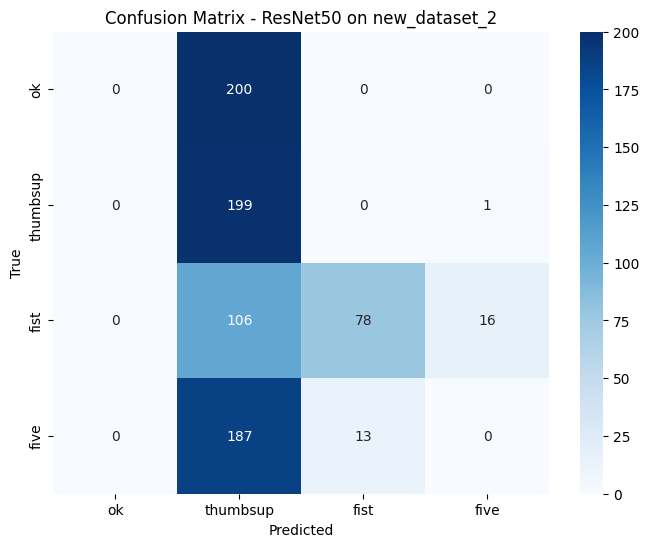


--- Random Forest on new_dataset_2 ---
Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Classification report error: Number of classes, 5, does not match size of target_names, 4. Try specifying the labels parameter
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     200.0
           1       0.00      0.00      0.00     200.0
           2       0.00      0.00      0.00     200.0
           3       0.00      0.00      0.00     200.0
           5       0.00      0.00      0.00       0.0

    accuracy                           0.00     800.0
   macro avg       0.00      0.00      0.00     800.0
weighted avg       0.00      0.00      0.00     800.0



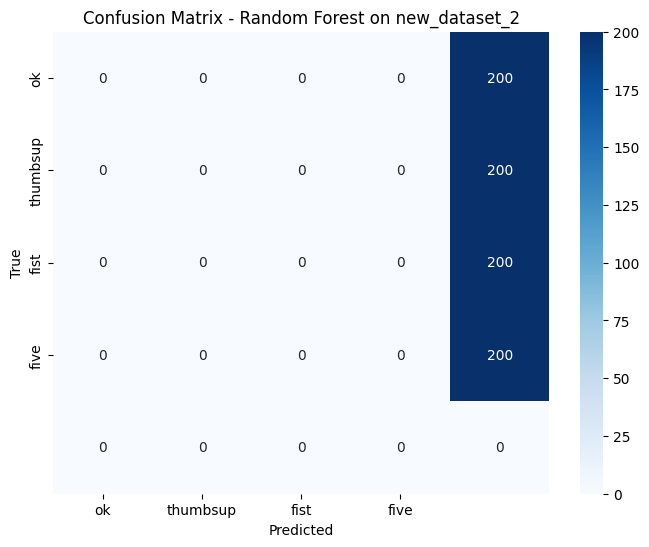

In [8]:
import os
import cv2
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# ---------- CNN Model Definition ----------
class HandGestureCNN(nn.Module):
    def __init__(self):
        super(HandGestureCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.drop1 = nn.Dropout(0.25)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.drop2 = nn.Dropout(0.25)

        self.fc1 = nn.Linear(64 * 25 * 30, 128)
        self.drop3 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 6)

    def forward(self, x):
        x = self.drop1(self.pool1(torch.relu(self.bn1(self.conv1(x)))))
        x = self.drop2(self.pool2(torch.relu(self.bn2(self.conv2(x)))))
        x = x.view(-1, 64 * 25 * 30)
        x = self.drop3(torch.relu(self.fc1(x)))
        return self.fc2(x)

# ---------- HOG Feature Extraction ----------
def extract_hog_features(X):
    features = []
    for image in X:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        resized = cv2.resize(gray, (120, 100))
        _, thresh = cv2.threshold(resized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        hog_vec, _ = hog(thresh, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        features.append(hog_vec)
    return np.array(features)

# ---------- Evaluation ----------
def evaluate_model(y_true, y_pred, class_names, title):
    print(f"\n--- {title} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted', zero_division=0))
    print("Recall:", recall_score(y_true, y_pred, average='weighted', zero_division=0))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted', zero_division=0))

    try:
        print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))
    except ValueError as e:
        print("Classification report error:", e)
        print(classification_report(y_true, y_pred, zero_division=0))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="Blues")
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# ---------- Setup ----------
data_paths = [
    "/home/npp-vlm/Dipan EXP/ADataMining/new_dataset_1",
    "/home/npp-vlm/Dipan EXP/ADataMining/new_dataset_2"
]

list_of_gestures = ['blank', 'ok', 'thumbsup', 'thumbsdown', 'fist', 'five']

cnn_transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((100, 120)),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: (x > 0.5).float())  # Binarize
])

resnet_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Lambda(lambda x: (x > 0.5).float()),  # Binarize
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# ---------- Load Models ----------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

cnn_model = HandGestureCNN()
cnn_model.load_state_dict(torch.load("hand_gesture_model.pth", map_location=device))
cnn_model.to(device)
cnn_model.eval()

resnet_model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V1)
resnet_model.fc = nn.Sequential(
    nn.Linear(resnet_model.fc.in_features, 1024),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(1024, 6)
)
resnet_model.load_state_dict(torch.load("best_resnet_model.pth", map_location=device))
resnet_model.to(device)
resnet_model.eval()

rf_model = joblib.load("hand_gesture_rf_model.pkl")

# ---------- Main Evaluation Loop ----------
for path in data_paths:
    dataset_name = os.path.basename(path)
    present_classes = [cls for cls in list_of_gestures if os.path.exists(os.path.join(path, cls))]
    class_to_idx = {cls: idx for idx, cls in enumerate(present_classes)}

    print(f"\nTesting dataset: {dataset_name}")
    print("Available classes:", present_classes)

    # CNN Evaluation
    cnn_data = datasets.ImageFolder(path, transform=cnn_transform)
    cnn_loader = DataLoader(cnn_data, batch_size=32, shuffle=False)
    y_true, y_pred = [], []
    with torch.no_grad():
        for imgs, labels in cnn_loader:
            imgs = imgs.to(device)
            outputs = cnn_model(imgs)
            _, preds = torch.max(outputs, 1)
            y_pred.extend(preds.cpu().numpy())
            y_true.extend(labels.numpy())
    evaluate_model(y_true, y_pred, present_classes, f"CNN on {dataset_name}")

    # ResNet50 Evaluation
    resnet_data = datasets.ImageFolder(path, transform=resnet_transform)
    resnet_loader = DataLoader(resnet_data, batch_size=32, shuffle=False)
    y_true, y_pred = [], []
    with torch.no_grad():
        for imgs, labels in resnet_loader:
            imgs = imgs.to(device)
            outputs = resnet_model(imgs)
            _, preds = torch.max(outputs, 1)
            y_pred.extend(preds.cpu().numpy())
            y_true.extend(labels.numpy())
    evaluate_model(y_true, y_pred, present_classes, f"ResNet50 on {dataset_name}")

    # RF Evaluation
    images, labels = [], []
    for idx, cls in enumerate(present_classes):
        cls_folder = os.path.join(path, cls)
        for fname in os.listdir(cls_folder):
            img_path = os.path.join(cls_folder, fname)
            img = cv2.imread(img_path)
            if img is not None:
                images.append(img)
                labels.append(idx)
    hog_feats = extract_hog_features(images)
    X_scaled = StandardScaler().fit_transform(hog_feats)
    preds = rf_model.predict(X_scaled)
    evaluate_model(labels, preds, present_classes, f"Random Forest on {dataset_name}")
